# 2 layers model

#### Gathering of all functions needed to train a model:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import keras
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
import numpy as np
from keras.models import load_model
from numpy import argmax

def read_csv(filename):
    dataset = pd.read_csv(filename, encoding='utf-8')
    return dataset

def one_hot_encode(dataset):
    dataset_one_hot_encoded = pd.get_dummies(dataset)  
    return dataset_one_hot_encoded

def divide_X_y(dataset, index_sep):
    X = dataset.iloc[:,:index_sep]
    y = dataset.iloc[:,index_sep:]
    return X,y

def split_train_test(X, y, test_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)
    return X_train, X_test, y_train, y_test
    
def graph_loss_vs_epochs(history, save_image_filename, title):
    training_loss = history.history['loss']
    test_loss = history.history['val_loss']
    epoch_count = range(1, len(training_loss) + 1)
    plt.title(title)
    plt.plot(epoch_count, training_loss, 'r--')
    plt.plot(epoch_count, test_loss, 'b-')
    plt.legend(['Training Loss', 'Test Loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss') 
    plt.axvline(x = epoch_count[test_loss.index(min(test_loss))], color = 'c', linestyle="dotted")
    plt.savefig(save_image_filename)
    plt.show()
    
def save_history(filename, model):
    # ejemplo de filename:'history1.npy'
    np.save(filename,model.history.history)
    
def load_history(filename):
    history=np.load(filename,allow_pickle='TRUE').item()
    return history

def evaluate_model(model, X_test, y_test):
    print('\nEvaluating:')
    (test_loss, test_accuracy) = model.evaluate(X_test, y_test)
    print(f'\nTest accuracy: {test_accuracy * 100:>0.1f}%, test loss: {test_loss:>8f}')
    
def get_label(column):
    label = y_test.columns[column]
    return label.replace('Nivel de Adaptación_', '')

def fill_test_ds_labels(model, test_ds_filename, output_test_filename):
    test_ds = read_csv(test_ds_filename)
    test_ds = pd.get_dummies(test_ds)
    nivel_de_adaptacion_test_ds = []
    for index,test in test_ds.iterrows():
        test_ds_pred = pd.DataFrame(test).transpose()
        test_oh = pd.get_dummies(test_ds_pred)
        prediction = model.predict(test_oh)
        nivel_de_adaptacion_test_ds.append((index+1,get_label(argmax(prediction))))
    print(len(nivel_de_adaptacion_test_ds))
    nivel_de_adaptacion_df = pd.DataFrame(nivel_de_adaptacion_test_ds, columns=['id','Nivel de Adaptación']).reset_index(drop=True)
    nivel_de_adaptacion_df.to_csv(output_test_filename,index=False)

##### Loading, preparing and dividing dataset for Experiments:

In [3]:
index_sep = 31
test_size=0.2
dataset = read_csv('../training-ds.csv')
dataset = one_hot_encode(dataset)
X, y = divide_X_y(dataset, index_sep)
X_train, X_test, y_train, y_test = split_train_test(X, y, test_size)

### Model 2: V1
#### Model 2 consists in 2 hidden Dense layers:
    learning_rate = 0.01
    batch_size = 64
    loss_fn = CategoricalCrossentropy
    optimizer = Adam
    Hidden layers:
        1. units = 10, activation = relu
        2. units = 10, activation = relu

In [28]:
model = tf.keras.Sequential([      
      tf.keras.layers.Dense(10, activation='relu'),
      tf.keras.layers.Dense(10, activation='relu'),
      tf.keras.layers.Dense(3)
    ])

Epoch 1/4000
13/13 - 2s - loss: 1.0330 - accuracy: 0.4475 - val_loss: 0.8861 - val_accuracy: 0.5751

Epoch 00001: val_loss improved from inf to 0.88605, saving model to models\model_2L_v1
INFO:tensorflow:Assets written to: models\model_2L_v1\assets
Epoch 2/4000
13/13 - 0s - loss: 0.8801 - accuracy: 0.5668 - val_loss: 0.8413 - val_accuracy: 0.6580

Epoch 00002: val_loss improved from 0.88605 to 0.84131, saving model to models\model_2L_v1
INFO:tensorflow:Assets written to: models\model_2L_v1\assets
Epoch 3/4000
13/13 - 0s - loss: 0.8341 - accuracy: 0.6083 - val_loss: 0.7738 - val_accuracy: 0.6580

Epoch 00003: val_loss improved from 0.84131 to 0.77379, saving model to models\model_2L_v1
INFO:tensorflow:Assets written to: models\model_2L_v1\assets
Epoch 4/4000
13/13 - 0s - loss: 0.7847 - accuracy: 0.6446 - val_loss: 0.7580 - val_accuracy: 0.6684

Epoch 00004: val_loss improved from 0.77379 to 0.75801, saving model to models\model_2L_v1
INFO:tensorflow:Assets written to: models\model_2L_v1

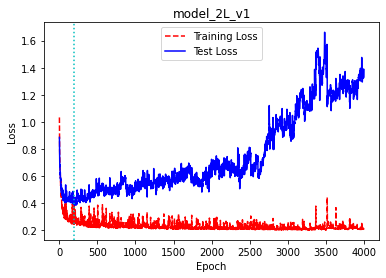

In [29]:
learning_rate = 0.01
batch_size = 64
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate)
metrics = ['accuracy']
model_filename = 'models/model_2L_v1'
model_l_v_e_filename = 'loss_vs_epochs_images/model_2L_v1_le.png'
model_l_v_e_title = 'model_2L_v1'
model_history_filename = 'history/history_model_2L_v1'

model.compile(optimizer, loss_fn, metrics)


checkpoint = ModelCheckpoint(model_filename, monitor='val_loss', verbose=1,save_best_only=True, mode='min')
model.fit(X_train, y_train, epochs = 4000,  validation_data=(X_test, y_test),batch_size = batch_size,callbacks=[checkpoint], verbose=2)
model.summary()
graph_loss_vs_epochs(model.history, model_l_v_e_filename, model_l_v_e_title)
save_history(model_history_filename, model)

In [30]:
best_m1_v1 = load_model(model_filename)
evaluate_model(best_m1_v1, X_test, y_test)


Evaluating:
7/7 [==============================] - 1s 2ms/step - loss: 0.3861 - accuracy: 0.8342

Test accuracy: 83.4%, test loss: 0.386146


In [31]:
test_ds_filename = '../test-ds.csv'
output_filename_test_ds_labeled = 'test-ds-m2L_v1.csv'
fill_test_ds_labels(model, test_ds_filename, output_filename_test_ds_labeled)

241


### Model 2: V2
#### Model 2 consists in 2 hidden Dense layers:
    learning_rate = 0.005
    batch_size = 64
    loss_fn = CategoricalCrossentropy
    optimizer = Adam
    Hidden layers:
        1. units = 20, activation = relu
        2. units = 20, activation = relu

In [34]:
model = tf.keras.Sequential([      
      tf.keras.layers.Dense(20, activation='relu'),
      tf.keras.layers.Dense(20, activation='relu'),
      tf.keras.layers.Dense(3)
    ])

Epoch 1/4000
13/13 - 2s - loss: 0.9551 - accuracy: 0.5435 - val_loss: 0.8595 - val_accuracy: 0.6218

Epoch 00001: val_loss improved from inf to 0.85945, saving model to models\model_2L_v2
INFO:tensorflow:Assets written to: models\model_2L_v2\assets
Epoch 2/4000
13/13 - 0s - loss: 0.8386 - accuracy: 0.6187 - val_loss: 0.8256 - val_accuracy: 0.6788

Epoch 00002: val_loss improved from 0.85945 to 0.82556, saving model to models\model_2L_v2
INFO:tensorflow:Assets written to: models\model_2L_v2\assets
Epoch 3/4000
13/13 - 0s - loss: 0.7819 - accuracy: 0.6641 - val_loss: 0.7378 - val_accuracy: 0.6632

Epoch 00003: val_loss improved from 0.82556 to 0.73782, saving model to models\model_2L_v2
INFO:tensorflow:Assets written to: models\model_2L_v2\assets
Epoch 4/4000
13/13 - 0s - loss: 0.7399 - accuracy: 0.6732 - val_loss: 0.7118 - val_accuracy: 0.6839

Epoch 00004: val_loss improved from 0.73782 to 0.71180, saving model to models\model_2L_v2
INFO:tensorflow:Assets written to: models\model_2L_v2

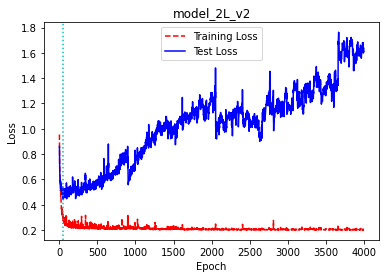

In [35]:
learning_rate = 0.005
batch_size = 64
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate)
metrics = ['accuracy']
model_filename = 'models/model_2L_v2'
model_l_v_e_filename = 'loss_vs_epochs_images/model_2L_v2_le.png'
model_l_v_e_title = 'model_2L_v2'
model_history_filename = 'history/history_model_2L_v2'

model.compile(optimizer, loss_fn, metrics)


checkpoint = ModelCheckpoint(model_filename, monitor='val_loss', verbose=1,save_best_only=True, mode='min')
model.fit(X_train, y_train, epochs = 4000,  validation_data=(X_test, y_test),batch_size = batch_size,callbacks=[checkpoint], verbose=2)
model.summary()
graph_loss_vs_epochs(model.history, model_l_v_e_filename, model_l_v_e_title)
save_history(model_history_filename, model)

In [36]:
best_m1_v2 = load_model(model_filename)
evaluate_model(best_m1_v2, X_test, y_test)


Evaluating:
7/7 [==============================] - 1s 3ms/step - loss: 0.4410 - accuracy: 0.8135

Test accuracy: 81.3%, test loss: 0.441027


In [37]:
output_filename_test_ds_labeled = 'test-ds-m2L_v2.csv'
fill_test_ds_labels(model, test_ds_filename, output_filename_test_ds_labeled)

241


### Model 2: V3
#### Model 2 consists in 2 hidden Dense layers:
    learning_rate = 0.001
    batch_size = 64
    loss_fn = CategoricalCrossentropy
    optimizer = Adam
    Hidden layers:
        1. units = 10, activation = relu
        2. units = 20, activation = relu

In [40]:
model = tf.keras.Sequential([      
      tf.keras.layers.Dense(10, activation='relu'),
      tf.keras.layers.Dense(20, activation='relu'),
      tf.keras.layers.Dense(3)
    ])

Epoch 1/4000
13/13 - 1s - loss: 1.0943 - accuracy: 0.5084 - val_loss: 1.0299 - val_accuracy: 0.5699

Epoch 00001: val_loss improved from inf to 1.02994, saving model to models\model_2L_v3
INFO:tensorflow:Assets written to: models\model_2L_v3\assets
Epoch 2/4000
13/13 - 0s - loss: 1.0485 - accuracy: 0.5084 - val_loss: 0.9970 - val_accuracy: 0.5751

Epoch 00002: val_loss improved from 1.02994 to 0.99698, saving model to models\model_2L_v3
INFO:tensorflow:Assets written to: models\model_2L_v3\assets
Epoch 3/4000
13/13 - 0s - loss: 1.0133 - accuracy: 0.5123 - val_loss: 0.9686 - val_accuracy: 0.5751

Epoch 00003: val_loss improved from 0.99698 to 0.96860, saving model to models\model_2L_v3
INFO:tensorflow:Assets written to: models\model_2L_v3\assets
Epoch 4/4000
13/13 - 0s - loss: 0.9790 - accuracy: 0.5240 - val_loss: 0.9389 - val_accuracy: 0.6010

Epoch 00004: val_loss improved from 0.96860 to 0.93894, saving model to models\model_2L_v3
INFO:tensorflow:Assets written to: models\model_2L_v3

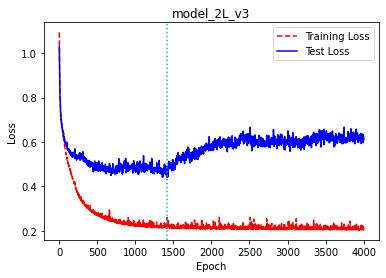

In [42]:
learning_rate = 0.001
batch_size = 64
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate)
metrics = ['accuracy']
model_filename = 'models/model_2L_v3'
model_l_v_e_filename = 'loss_vs_epochs_images/model_2L_v3_le.png'
model_l_v_e_title = 'model_2L_v3'
model_history_filename = 'history/history_model_2L_v3'

model.compile(optimizer, loss_fn, metrics)


checkpoint = ModelCheckpoint(model_filename, monitor='val_loss', verbose=1,save_best_only=True, mode='min')
model.fit(X_train, y_train, epochs = 4000,  validation_data=(X_test, y_test),batch_size = batch_size,callbacks=[checkpoint], verbose=2)
model.summary()
graph_loss_vs_epochs(model.history, model_l_v_e_filename, model_l_v_e_title)
save_history(model_history_filename, model)

In [43]:
test_ds_filename = '../test-ds.csv'
best_m1_v3 = load_model(model_filename)
evaluate_model(best_m1_v3, X_test, y_test)


Evaluating:
7/7 [==============================] - 1s 3ms/step - loss: 0.4414 - accuracy: 0.8238

Test accuracy: 82.4%, test loss: 0.441350


In [44]:
output_filename_test_ds_labeled = 'test-ds-m2L_v3.csv'
fill_test_ds_labels(model, test_ds_filename, output_filename_test_ds_labeled)

241


### Model 2: V4
#### Model 2 consists in 2 hidden Dense layers:
    learning_rate = 0.01
    batch_size = 32
    loss_fn = CategoricalCrossentropy
    optimizer = Adam
    Hidden layers:
        1. units = 128, activation = relu
        2. units = 64, activation = relu

Epoch 1/3000
25/25 - 3s - loss: 0.8138 - accuracy: 0.6187 - val_loss: 0.7019 - val_accuracy: 0.7150

Epoch 00001: val_loss improved from inf to 0.70185, saving model to models\model_2L_v4
INFO:tensorflow:Assets written to: models\model_2L_v4\assets
Epoch 2/3000
25/25 - 0s - loss: 0.6757 - accuracy: 0.7056 - val_loss: 0.6856 - val_accuracy: 0.6943

Epoch 00002: val_loss improved from 0.70185 to 0.68562, saving model to models\model_2L_v4
INFO:tensorflow:Assets written to: models\model_2L_v4\assets
Epoch 3/3000
25/25 - 0s - loss: 0.6403 - accuracy: 0.7108 - val_loss: 0.5660 - val_accuracy: 0.7565

Epoch 00003: val_loss improved from 0.68562 to 0.56595, saving model to models\model_2L_v4
INFO:tensorflow:Assets written to: models\model_2L_v4\assets
Epoch 4/3000
25/25 - 0s - loss: 0.5450 - accuracy: 0.7497 - val_loss: 0.5311 - val_accuracy: 0.7720

Epoch 00004: val_loss improved from 0.56595 to 0.53107, saving model to models\model_2L_v4
INFO:tensorflow:Assets written to: models\model_2L_v4

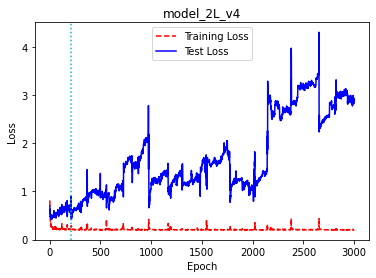

In [5]:
model = tf.keras.Sequential([      
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(3)
    ])
learning_rate = 0.01
batch_size = 32
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate)
metrics = ['accuracy']
model_filename = 'models/model_2L_v4'
model_l_v_e_filename = 'loss_vs_epochs_images/model_2L_v4_le.png'
model_l_v_e_title = 'model_2L_v4'
model_history_filename = 'history/history_model_2L_v4'

model.compile(optimizer, loss_fn, metrics)


checkpoint = ModelCheckpoint(model_filename, monitor='val_loss', verbose=1,save_best_only=True, mode='min')
model.fit(X_train, y_train, epochs = 3000,  validation_data=(X_test, y_test),batch_size = batch_size,callbacks=[checkpoint], verbose=2)
model.summary()
graph_loss_vs_epochs(model.history, model_l_v_e_filename, model_l_v_e_title)
save_history(model_history_filename, model)

In [6]:
best_m1_v4 = load_model(model_filename)
evaluate_model(best_m1_v4, X_test, y_test)


Evaluating:
7/7 [==============================] - 1s 3ms/step - loss: 0.4152 - accuracy: 0.8290

Test accuracy: 82.9%, test loss: 0.415200


In [8]:
test_ds_filename = '../test-ds.csv'
output_filename_test_ds_labeled = 'test-ds-m2L_v4.csv'
fill_test_ds_labels(model, test_ds_filename, output_filename_test_ds_labeled)

241


### Model 2: V5
#### Model 2 consists in 2 hidden Dense layers:
    learning_rate = 0.005
    batch_size = 32
    loss_fn = CategoricalCrossentropy
    optimizer = Adam
    Hidden layers:
        1. units = 128, activation = relu
        2. units = 128, activation = relu

Epoch 1/3000
25/25 - 3s - loss: 0.8089 - accuracy: 0.6005 - val_loss: 0.6582 - val_accuracy: 0.7098

Epoch 00001: val_loss improved from inf to 0.65822, saving model to models\model_2L_v5
INFO:tensorflow:Assets written to: models\model_2L_v5\assets
Epoch 2/3000
25/25 - 0s - loss: 0.6383 - accuracy: 0.7017 - val_loss: 0.6059 - val_accuracy: 0.7409

Epoch 00002: val_loss improved from 0.65822 to 0.60586, saving model to models\model_2L_v5
INFO:tensorflow:Assets written to: models\model_2L_v5\assets
Epoch 3/3000
25/25 - 0s - loss: 0.5428 - accuracy: 0.7756 - val_loss: 0.5574 - val_accuracy: 0.7150

Epoch 00003: val_loss improved from 0.60586 to 0.55735, saving model to models\model_2L_v5
INFO:tensorflow:Assets written to: models\model_2L_v5\assets
Epoch 4/3000
25/25 - 0s - loss: 0.4788 - accuracy: 0.7860 - val_loss: 0.5172 - val_accuracy: 0.7876

Epoch 00004: val_loss improved from 0.55735 to 0.51718, saving model to models\model_2L_v5
INFO:tensorflow:Assets written to: models\model_2L_v5

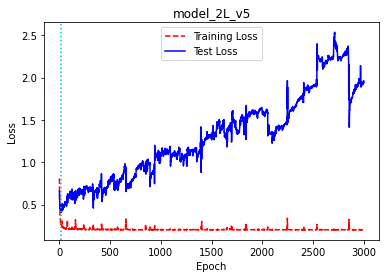

In [9]:
model = tf.keras.Sequential([      
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(3)
    ])
learning_rate = 0.005
batch_size = 32
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate)
metrics = ['accuracy']
model_filename = 'models/model_2L_v5'
model_l_v_e_filename = 'loss_vs_epochs_images/model_2L_v5_le.png'
model_l_v_e_title = 'model_2L_v5'
model_history_filename = 'history/history_model_2L_v5'

model.compile(optimizer, loss_fn, metrics)


checkpoint = ModelCheckpoint(model_filename, monitor='val_loss', verbose=1,save_best_only=True, mode='min')
model.fit(X_train, y_train, epochs = 3000,  validation_data=(X_test, y_test),batch_size = batch_size,callbacks=[checkpoint], verbose=2)
model.summary()
graph_loss_vs_epochs(model.history, model_l_v_e_filename, model_l_v_e_title)
save_history(model_history_filename, model)

In [10]:
best_m1_v5 = load_model(model_filename)
evaluate_model(best_m1_v5, X_test, y_test)


Evaluating:
7/7 [==============================] - 1s 4ms/step - loss: 0.4076 - accuracy: 0.8238

Test accuracy: 82.4%, test loss: 0.407637


In [11]:
test_ds_filename = '../test-ds.csv'
output_filename_test_ds_labeled = 'test-ds-m2L_v5.csv'
fill_test_ds_labels(model, test_ds_filename, output_filename_test_ds_labeled)

241


##### Model_2 v6
    2 layers
    learning_rate = 0.001
    batch_size = 16
    optimizer: ADAM
    Dense units:  128, 192

Epoch 1/2000
49/49 - 3s - loss: 0.8417 - accuracy: 0.6057 - val_loss: 0.7584 - val_accuracy: 0.6736

Epoch 00001: val_loss improved from inf to 0.75837, saving model to models\model_2L_v6
INFO:tensorflow:Assets written to: models\model_2L_v6\assets
Epoch 2/2000
49/49 - 0s - loss: 0.7242 - accuracy: 0.6861 - val_loss: 0.6775 - val_accuracy: 0.7150

Epoch 00002: val_loss improved from 0.75837 to 0.67746, saving model to models\model_2L_v6
INFO:tensorflow:Assets written to: models\model_2L_v6\assets
Epoch 3/2000
49/49 - 0s - loss: 0.6294 - accuracy: 0.7484 - val_loss: 0.6171 - val_accuracy: 0.7254

Epoch 00003: val_loss improved from 0.67746 to 0.61708, saving model to models\model_2L_v6
INFO:tensorflow:Assets written to: models\model_2L_v6\assets
Epoch 4/2000
49/49 - 0s - loss: 0.5803 - accuracy: 0.7367 - val_loss: 0.5631 - val_accuracy: 0.7513

Epoch 00004: val_loss improved from 0.61708 to 0.56311, saving model to models\model_2L_v6
INFO:tensorflow:Assets written to: models\model_2L_v6

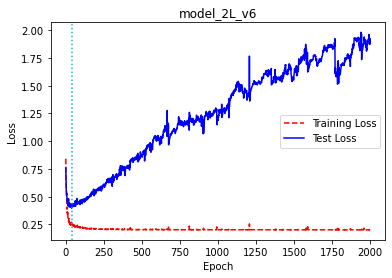

In [3]:
model = tf.keras.Sequential([      
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(192, activation='relu'),
      tf.keras.layers.Dense(3)
    ])
learning_rate = 0.001
batch_size = 16
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate)
metrics = ['accuracy']
model_filename = 'models/model_2L_v6'
model_l_v_e_filename = 'loss_vs_epochs_images/model_2L_v6_le.png'
model_l_v_e_title = 'model_2L_v6'
model_history_filename = 'history/history_model_2L_v6'

model.compile(optimizer, loss_fn, metrics)


checkpoint = ModelCheckpoint(model_filename, monitor='val_loss', verbose=1,save_best_only=True, mode='min')
model.fit(X_train, y_train, epochs = 2000,  validation_data=(X_test, y_test),batch_size = batch_size,callbacks=[checkpoint], verbose=2)
model.summary()
graph_loss_vs_epochs(model.history, model_l_v_e_filename, model_l_v_e_title)
save_history(model_history_filename, model)

In [4]:
best_m1_v6 = load_model(model_filename)
evaluate_model(best_m1_v6, X_test, y_test)


Evaluating:
7/7 [==============================] - 1s 2ms/step - loss: 0.3967 - accuracy: 0.8083

Test accuracy: 80.8%, test loss: 0.396697


In [5]:
test_ds_filename = '../test-ds.csv'
output_filename_test_ds_labeled = 'test-ds-m2L_v6.csv'
fill_test_ds_labels(model, test_ds_filename, output_filename_test_ds_labeled)

241


### Model 2: V7
#### Model 2 consists in 2 hidden Dense layers:
    learning_rate = 0.001
    batch_size = 32
    loss_fn = CategoricalCrossentropy
    optimizer = Adam
    Hidden layers:
        1. units = 64, activation = relu
        2. units = 96, activation = relu

Epoch 1/2000
25/25 - 2s - loss: 0.9179 - accuracy: 0.5383 - val_loss: 0.8196 - val_accuracy: 0.6425

Epoch 00001: val_loss improved from inf to 0.81960, saving model to models\model_2L_v7
INFO:tensorflow:Assets written to: models\model_2L_v7\assets
Epoch 2/2000
25/25 - 0s - loss: 0.7914 - accuracy: 0.6459 - val_loss: 0.7548 - val_accuracy: 0.6736

Epoch 00002: val_loss improved from 0.81960 to 0.75481, saving model to models\model_2L_v7
INFO:tensorflow:Assets written to: models\model_2L_v7\assets
Epoch 3/2000
25/25 - 0s - loss: 0.7468 - accuracy: 0.6757 - val_loss: 0.7312 - val_accuracy: 0.7098

Epoch 00003: val_loss improved from 0.75481 to 0.73125, saving model to models\model_2L_v7
INFO:tensorflow:Assets written to: models\model_2L_v7\assets
Epoch 4/2000
25/25 - 0s - loss: 0.7022 - accuracy: 0.7056 - val_loss: 0.6831 - val_accuracy: 0.7098

Epoch 00004: val_loss improved from 0.73125 to 0.68309, saving model to models\model_2L_v7
INFO:tensorflow:Assets written to: models\model_2L_v7

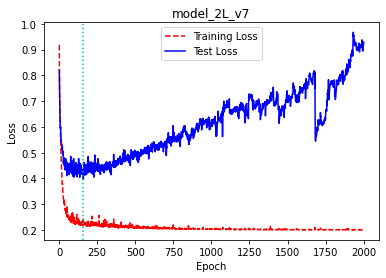

In [8]:
model = tf.keras.Sequential([      
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(96, activation='relu'),
      tf.keras.layers.Dense(3)
    ])
learning_rate = 0.001
batch_size = 32
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate)
metrics = ['accuracy']
model_filename = 'models/model_2L_v7'
model_l_v_e_filename = 'loss_vs_epochs_images/model_2L_v7_le.png'
model_l_v_e_title = 'model_2L_v7'
model_history_filename = 'history/history_model_2L_v7'

model.compile(optimizer, loss_fn, metrics)


checkpoint = ModelCheckpoint(model_filename, monitor='val_loss', verbose=1,save_best_only=True, mode='min')
model.fit(X_train, y_train, epochs = 2000,  validation_data=(X_test, y_test),batch_size = batch_size,callbacks=[checkpoint], verbose=2)
model.summary()
graph_loss_vs_epochs(model.history, model_l_v_e_filename, model_l_v_e_title)
save_history(model_history_filename, model)

In [9]:
best_m1_v7 = load_model(model_filename)
evaluate_model(best_m1_v7, X_test, y_test)


Evaluating:
7/7 [==============================] - 1s 3ms/step - loss: 0.3965 - accuracy: 0.8497

Test accuracy: 85.0%, test loss: 0.396529


In [10]:
test_ds_filename = '../test-ds.csv'
output_filename_test_ds_labeled = 'test-ds-m2L_v7.csv'
fill_test_ds_labels(model, test_ds_filename, output_filename_test_ds_labeled)

241


### Model 2: V8
#### Model 2 consists in 2 hidden Dense layers:
    learning_rate = 0.02
    batch_size = 32
    loss_fn = CategoricalCrossentropy
    optimizer = Adam
    Hidden layers:
        1. units = 32, activation = relu
        2. units = 32, activation = relu

Epoch 1/2000
25/25 - 2s - loss: 0.8114 - accuracy: 0.6394 - val_loss: 0.7298 - val_accuracy: 0.6632

Epoch 00001: val_loss improved from inf to 0.72981, saving model to models\model_2L_v8
INFO:tensorflow:Assets written to: models\model_2L_v8\assets
Epoch 2/2000
25/25 - 0s - loss: 0.7379 - accuracy: 0.6498 - val_loss: 0.6232 - val_accuracy: 0.7565

Epoch 00002: val_loss improved from 0.72981 to 0.62324, saving model to models\model_2L_v8
INFO:tensorflow:Assets written to: models\model_2L_v8\assets
Epoch 3/2000
25/25 - 0s - loss: 0.6288 - accuracy: 0.7211 - val_loss: 0.5920 - val_accuracy: 0.7254

Epoch 00003: val_loss improved from 0.62324 to 0.59203, saving model to models\model_2L_v8
INFO:tensorflow:Assets written to: models\model_2L_v8\assets
Epoch 4/2000
25/25 - 0s - loss: 0.5903 - accuracy: 0.7497 - val_loss: 0.5674 - val_accuracy: 0.7772

Epoch 00004: val_loss improved from 0.59203 to 0.56741, saving model to models\model_2L_v8
INFO:tensorflow:Assets written to: models\model_2L_v8

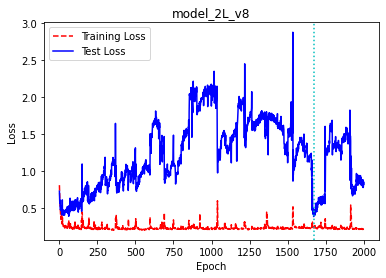

In [12]:
model = tf.keras.Sequential([      
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(3)
    ])
learning_rate = 0.02
batch_size = 32
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate)
metrics = ['accuracy']
model_filename = 'models/model_2L_v8'
model_l_v_e_filename = 'loss_vs_epochs_images/model_2L_v8_le.png'
model_l_v_e_title = 'model_2L_v8'
model_history_filename = 'history/history_model_2L_v8'

model.compile(optimizer, loss_fn, metrics)


checkpoint = ModelCheckpoint(model_filename, monitor='val_loss', verbose=1,save_best_only=True, mode='min')
model.fit(X_train, y_train, epochs = 2000,  validation_data=(X_test, y_test),batch_size = batch_size,callbacks=[checkpoint], verbose=2)
model.summary()
graph_loss_vs_epochs(model.history, model_l_v_e_filename, model_l_v_e_title)
save_history(model_history_filename, model)

In [13]:
best_m1_v8 = load_model(model_filename)
evaluate_model(best_m1_v8, X_test, y_test)


Evaluating:
7/7 [==============================] - 1s 3ms/step - loss: 0.3884 - accuracy: 0.8342

Test accuracy: 83.4%, test loss: 0.388416


In [14]:
test_ds_filename = '../test-ds.csv'
output_filename_test_ds_labeled = 'test-ds-m2L_v8.csv'
fill_test_ds_labels(model, test_ds_filename, output_filename_test_ds_labeled)

241


### Model 2: V9
#### Model 2 consists in 2 hidden Dense layers:
    learning_rate = 0.001
    batch_size = 32
    loss_fn = CategoricalCrossentropy
    optimizer = Adam
    Hidden layers:
        1. units = 10, activation = sigmoid
        2. units = 10, activation = sigmoid

Epoch 1/1000
25/25 - 2s - loss: 0.9613 - accuracy: 0.4578 - val_loss: 0.9095 - val_accuracy: 0.5648

Epoch 00001: val_loss improved from inf to 0.90948, saving model to models\model_2L_v9
INFO:tensorflow:Assets written to: models\model_2L_v9\assets
Epoch 2/1000
25/25 - 0s - loss: 0.9174 - accuracy: 0.5045 - val_loss: 0.9144 - val_accuracy: 0.5907

Epoch 00002: val_loss did not improve from 0.90948
Epoch 3/1000
25/25 - 0s - loss: 0.9108 - accuracy: 0.5590 - val_loss: 0.9013 - val_accuracy: 0.5855

Epoch 00003: val_loss improved from 0.90948 to 0.90127, saving model to models\model_2L_v9
INFO:tensorflow:Assets written to: models\model_2L_v9\assets
Epoch 4/1000
25/25 - 0s - loss: 0.9027 - accuracy: 0.5266 - val_loss: 0.8972 - val_accuracy: 0.6010

Epoch 00004: val_loss improved from 0.90127 to 0.89721, saving model to models\model_2L_v9
INFO:tensorflow:Assets written to: models\model_2L_v9\assets
Epoch 5/1000
25/25 - 0s - loss: 0.8963 - accuracy: 0.5694 - val_loss: 0.8891 - val_accuracy: 

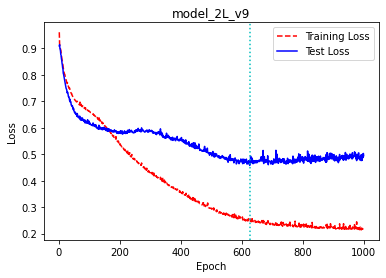

In [5]:
model = tf.keras.Sequential([      
      tf.keras.layers.Dense(32, activation='sigmoid'),
      tf.keras.layers.Dense(32, activation='sigmoid'),
      tf.keras.layers.Dense(3)
    ])
learning_rate = 0.001
batch_size = 32
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate)
metrics = ['accuracy']
model_filename = 'models/model_2L_v9'
model_l_v_e_filename = 'loss_vs_epochs_images/model_2L_v9_le.png'
model_l_v_e_title = 'model_2L_v9'
model_history_filename = 'history/history_model_2L_v9'

model.compile(optimizer, loss_fn, metrics)


checkpoint = ModelCheckpoint(model_filename, monitor='val_loss', verbose=1,save_best_only=True, mode='min')
model.fit(X_train, y_train, epochs = 1000,  validation_data=(X_test, y_test),batch_size = batch_size,callbacks=[checkpoint], verbose=2)
model.summary()
graph_loss_vs_epochs(model.history, model_l_v_e_filename, model_l_v_e_title)
save_history(model_history_filename, model)

In [6]:
best_m1_v9 = load_model(model_filename)
evaluate_model(best_m1_v9, X_test, y_test)


Evaluating:
7/7 [==============================] - 0s 3ms/step - loss: 0.4578 - accuracy: 0.8031

Test accuracy: 80.3%, test loss: 0.457763


In [7]:
test_ds_filename = '../test-ds.csv'
output_filename_test_ds_labeled = 'test-ds-m2L_v9.csv'
fill_test_ds_labels(model, test_ds_filename, output_filename_test_ds_labeled)

241


In [20]:
def plot_param(num_versions, param_name='val_accuracy'):
    params = []
    legend = []
    for i in range(1,num_versions+1):
        param = load_history(f'history/history_model_2L_v{i}.npy')[param_name][:200]
        x = range(len(param))
        params.append(param)
        plt.plot(x,param)
        legend.append(f"m2v{i}")
    plt.legend(legend, loc="upper right")
    plt.show()

#### Test loss

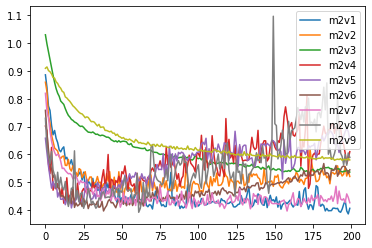

In [21]:
plot_param(9, param_name='val_loss')

#### Test accuracy:

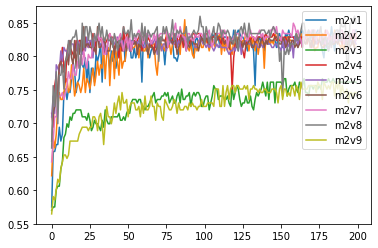

In [22]:
plot_param(9)

## Conclusions:

With 2 hidden layers, we got a maximum test accuracy of 85% and minimum test loss of 0.388416. In most of the variations, accuracy was greater than 80%, the loss test was varied, it remained in a range of 0.38 to 0.45